In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape
new_df = df.dropna().sample(90000, random_state=2)


In [4]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1


In [5]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [6]:
new_df.duplicated().sum()

np.int64(0)

is_duplicate
0    56702
1    33298
Name: count, dtype: int64
is_duplicate
0    63.002222
1    36.997778
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

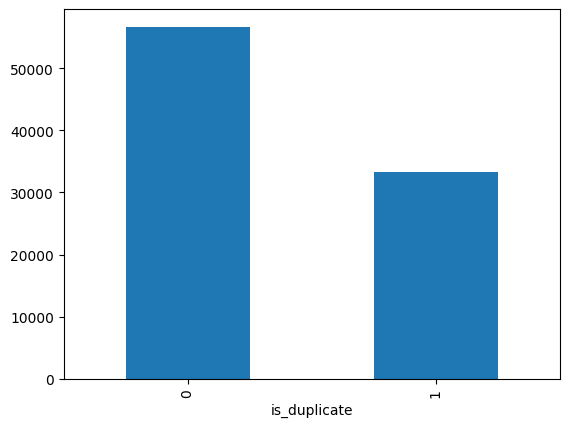

In [7]:
# Distribution of duplicate and non-duplicate questions

print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

In [8]:
# Repeated questions

qid = pd.Series(new_df['qid1'].tolist() + new_df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 151483
Number of questions getting repeated 16815


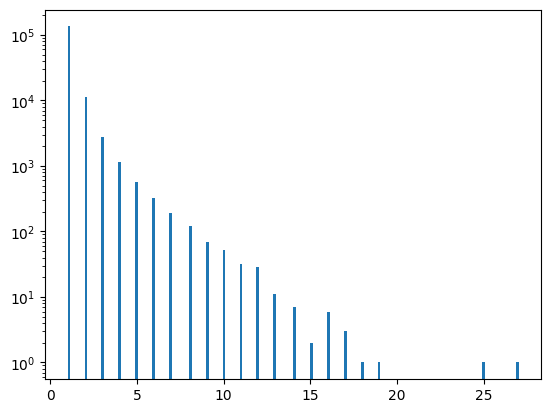

In [9]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [10]:
# Feature Engineering

new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [11]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64


In [12]:


# Now safely calculate word counts
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split()))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split()))

new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12


In [13]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2)

In [14]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,2
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,5
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,8


In [15]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return (len(w1) + len(w2))

In [16]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2,13
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4,12
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,2,9
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,5,25
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,8,23


In [17]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2,13,0.15
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4,12,0.33
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,2,9,0.22
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,5,25,0.20
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,8,23,0.35


In [18]:
# Save preprocessed DataFrame to CSV
new_df.to_csv('preprocessed_data(Basic).csv', index=False)

In [42]:
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
331535,331535,169053,295926,How can I learn Norwegian?,What is the quickest way to learn Norwegian?,1,26,44,5,8,2,13,0.15
45407,45407,81383,81384,How are currency rates determined?,Where and how are exchange rates determined?,1,34,44,5,7,4,12,0.33
286200,286200,285024,406729,What is substitution?,What is a substitute for caciocavallo?,0,21,38,3,6,2,9,0.22
157195,157195,245856,245857,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...,1,45,73,10,16,5,25,0.20
154346,154346,242075,242076,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...,1,59,64,11,12,8,23,0.35


minimum characters 1
maximum characters 391
average num of characters 59


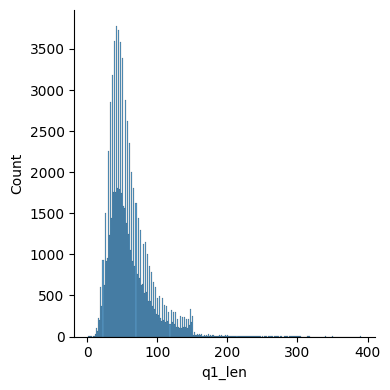

In [19]:
# Analysis of features
sns.displot(new_df, x='q1_len', height=4, aspect=1)
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))


minimum characters 1
maximum characters 1169
average num of characters 60


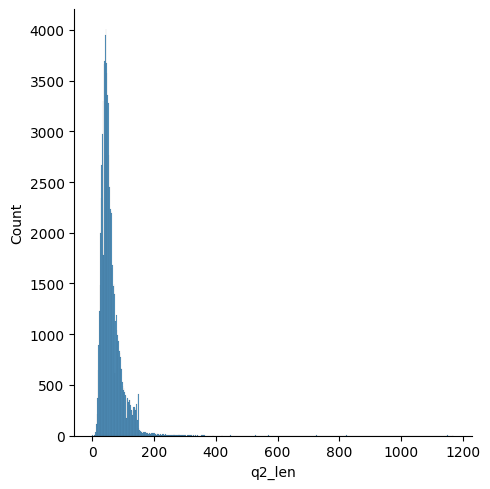

In [20]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

minimum words 1
maximum words 73
average num of words 10


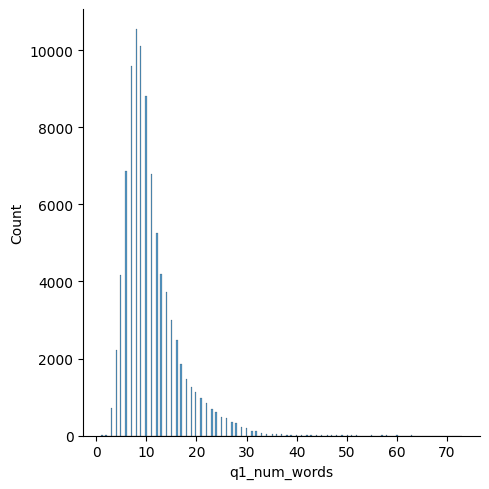

In [21]:

sns.displot(new_df['q1_num_words'])
print('minimum words',new_df['q1_num_words'].min())
print('maximum words',new_df['q1_num_words'].max())
print('average num of words',int(new_df['q1_num_words'].mean()))

minimum words 1
maximum words 237
average num of words 11


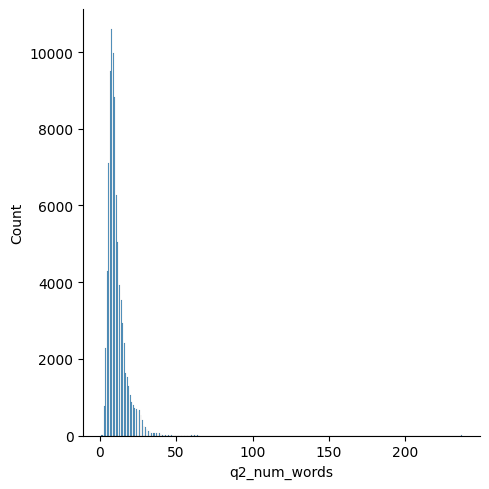

In [22]:
sns.displot(new_df['q2_num_words'])
print('minimum words',new_df['q2_num_words'].min())
print('maximum words',new_df['q2_num_words'].max())
print('average num of words',int(new_df['q2_num_words'].mean()))

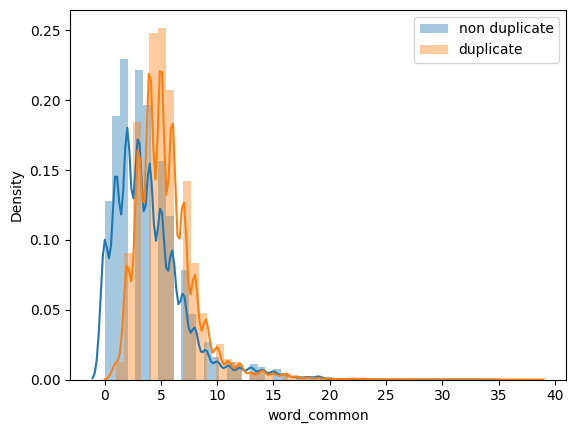

In [23]:
# common words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_common'],label='duplicate')
plt.legend()
plt.show()

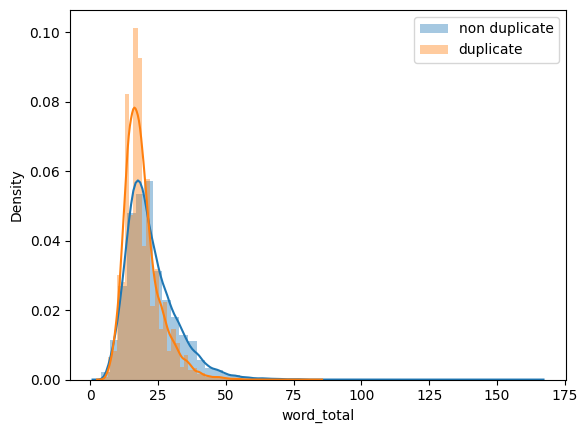

In [24]:


# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_total'],label='duplicate')
plt.legend()
plt.show()

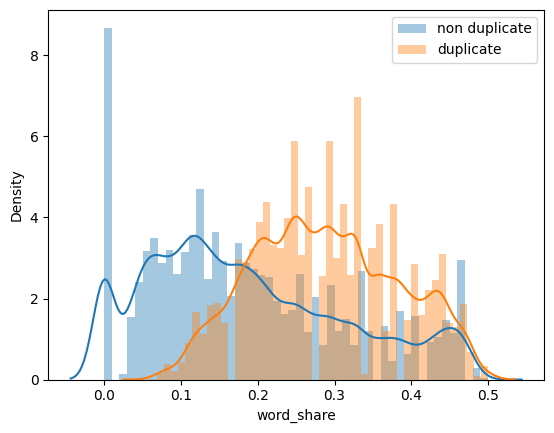

In [25]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [26]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
331535,How can I learn Norwegian?,What is the quickest way to learn Norwegian?
45407,How are currency rates determined?,Where and how are exchange rates determined?
286200,What is substitution?,What is a substitute for caciocavallo?
157195,How can I make iPhone 4s faster with IOS 9.2?,I have an iPhone 4S. How do I make it faster a...
154346,How can I help my girlfriend cope with her par...,What can I do to help my girlfriend through he...


In [27]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(90000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
331535,1,26,44,5,8,2,13,0.15
45407,1,34,44,5,7,4,12,0.33
286200,0,21,38,3,6,2,9,0.22
157195,1,45,73,10,16,5,25,0.20
154346,1,59,64,11,12,8,23,0.35


In [28]:

# merge texts
ques_df = new_df[['question1','question2']]
questions = list(ques_df['question1']) + list(ques_df['question2'])


In [29]:
shape = (len(questions))
print(shape)


180000


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(questions) #[90k, 1k]
# Split into q1 and q2 sparse matrices 
q1_arr = tfidf_matrix[:len(ques_df)] #[0:90000, 1000]
q2_arr = tfidf_matrix[len(ques_df):]#[90000:180000, 1000]

In [31]:

print(q1_arr.shape) 
print(q2_arr.shape)

(90000, 1000)
(90000, 1000)


In [32]:
# Convert to DataFrames
temp_df1 = pd.DataFrame.sparse.from_spmatrix(q1_arr, index=ques_df.index)
temp_df2 = pd.DataFrame.sparse.from_spmatrix(q2_arr, index=ques_df.index)

# Concatenate q1 and q2 features
temp_df = pd.concat([temp_df1, temp_df2], axis=1)

print("Shape after TF-IDF transformation:", temp_df.shape)

Shape after TF-IDF transformation: (90000, 2000)


In [33]:
finall_df = pd.concat([final_df, temp_df], axis=1)
print("Final shape:", finall_df.shape)
final_df.head()

Final shape: (90000, 2008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
331535,1,26,44,5,8,2,13,0.15
45407,1,34,44,5,7,4,12,0.33
286200,0,21,38,3,6,2,9,0.22
157195,1,45,73,10,16,5,25,0.20
154346,1,59,64,11,12,8,23,0.35


In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(finall_df.iloc[:,1:].values,finall_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [35]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
# Explained variance
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Captured:", sum(pca.explained_variance_ratio_))
print("Number of components selected:", pca.n_components_)



Explained Variance Ratio: [0.00538558 0.00473189 0.00396199 ... 0.0001984  0.00019812 0.00019807]
Total Variance Captured: 0.95018924832241
Number of components selected: 1640


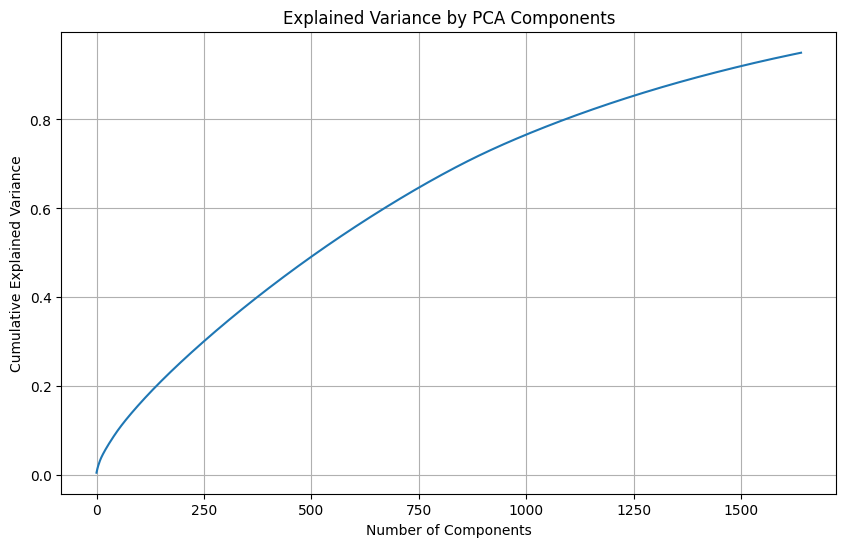

In [36]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()


In [37]:
print("Original shape:", X_train.shape)
print("Reduced shape:", X_train_pca.shape)


Original shape: (72000, 2007)
Reduced shape: (72000, 1640)


In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on training data
rf.fit(X_train_pca, y_train)

# Predict on test data
y_pred = rf.predict(X_test_pca)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7407222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.92      0.82     11387
           1       0.75      0.44      0.55      6613

    accuracy                           0.74     18000
   macro avg       0.74      0.68      0.69     18000
weighted avg       0.74      0.74      0.72     18000



In [40]:
from sklearn.metrics import log_loss

# Predict probabilities for log loss
y_proba_rf = rf.predict_proba(X_test_pca)

# Calculate log loss
loss_rf = log_loss(y_test, y_proba_rf)
print("Random Forest Log Loss:", loss_rf)


Random Forest Log Loss: 0.5296371360101223


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    n_estimators=500,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7255555555555555
              precision    recall  f1-score   support

           0       0.72      0.92      0.81     11369
           1       0.73      0.40      0.52      6631

    accuracy                           0.73     18000
   macro avg       0.73      0.66      0.66     18000
weighted avg       0.73      0.73      0.70     18000



In [ ]:
from sklearn.metrics import log_loss

# Predict probabilities (needed for log loss)
y_proba_xgb = xgb.predict_proba(X_test_pca)

# Calculate log loss
loss = log_loss(y_test, y_proba_xgb)
print("Log Loss:", loss)


NameError: name 'y_pred_rf' is not defined

In [ ]:
from sklearn.metrics import log_loss, roc_auc_score, roc_curve
# Predicted probabilities (needed for log loss & AUC)
y_proba_rf = rf.predict_proba(X_test)[:,1]

# Metrics
rf_logloss = log_loss(y_test, y_proba_rf)
rf_auc = roc_auc_score(y_test, y_proba_rf)

print("Random Forest Log Loss:", rf_logloss)
print("Random Forest ROC-AUC:", rf_auc)


Random Forest Log Loss: 0.4939133404787519
Random Forest ROC-AUC: 0.826714226415218


In [ ]:
y_proba_xgb = xgb.predict_proba(X_test)[:,1]

xgb_logloss = log_loss(y_test, y_proba_xgb)
xgb_auc = roc_auc_score(y_test, y_proba_xgb)

print("XGBoost Log Loss:", xgb_logloss)
print("XGBoost ROC-AUC:", xgb_auc)


XGBoost Log Loss: 0.5427665470716898
XGBoost ROC-AUC: 0.786765130646602


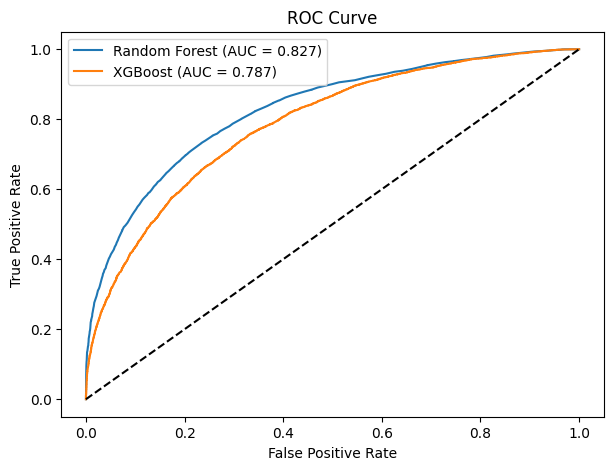

In [ ]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(7,5))
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {rf_auc:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {xgb_auc:.3f})")
plt.plot([0,1],[0,1],'k--')  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
